In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')

In [3]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2020  1970.560169              NaN
1        Afghanistan  2019  2065.036235              NaN
2        Afghanistan  2018  2033.804389              NaN
3        Afghanistan  2017  2058.400221              NaN
4        Afghanistan  2016  2057.067978              NaN
...              ...   ...          ...              ...
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN

[7176 rows x 4 columns]


In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

4 columns 7176 rows

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
del gdp_df['Value Footnotes']


In [6]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})

In [7]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
year_counts = gdp_df.groupby('Country')['Year'].nunique()


In [9]:
print(year_counts)

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64


In [10]:
start_year = gdp_df['Year'].min()
end_year = gdp_df['Year'].max()

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [11]:
#filtering 2020 data 
gdp_2020 = gdp_df[gdp_df['Year']==2020]
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]


In [19]:
# min and max for range
print(gdp_2020['GDP_Per_Capita'].min())
print(gdp_2020['GDP_Per_Capita'].max())

731.064073644609
112557.309471818


(array([110.,  61.,  22.,  21.,  14.,   7.,   1.,   2.,   1.,   1.]),
 array([   500.,  11950.,  23400.,  34850.,  46300.,  57750.,  69200.,
         80650.,  92100., 103550., 115000.]),
 <BarContainer object of 10 artists>)

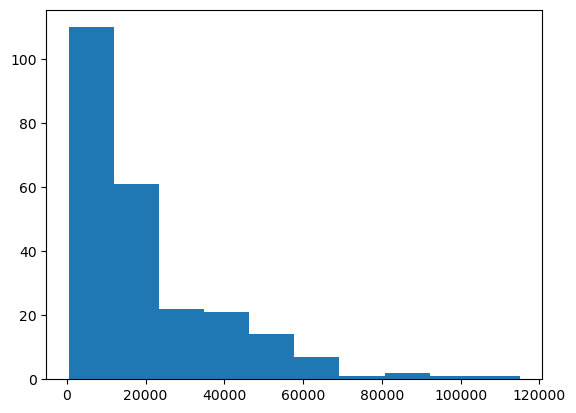

In [13]:
#histogram
plt.hist(gdp_2020.GDP_Per_Capita, range=(500,115000))

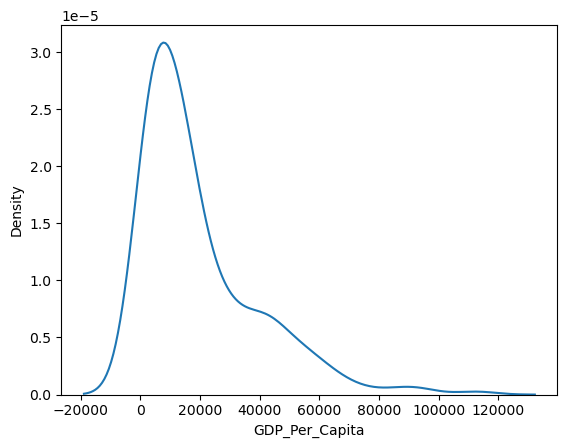

In [18]:
#density
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
plt.show()

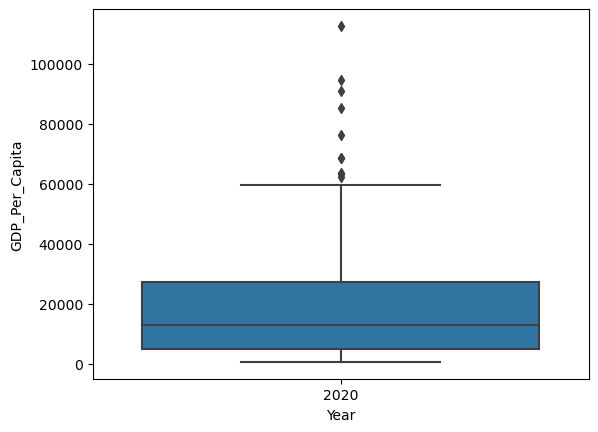

In [23]:
#boxplot
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

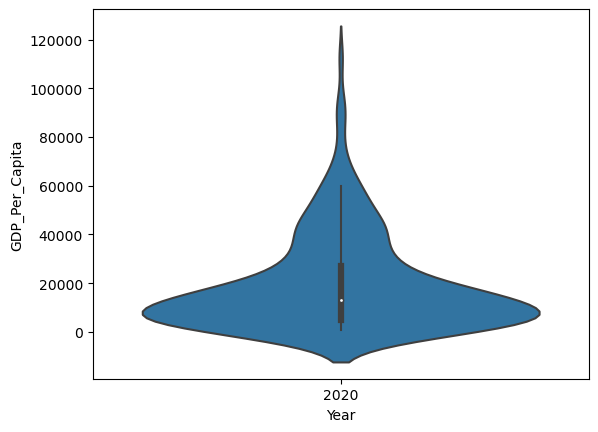

In [24]:
#violin
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])
plt.show

9. What was the median GDP per capita value in 2020?

In [25]:
gdp_2020['GDP_Per_Capita'].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [28]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


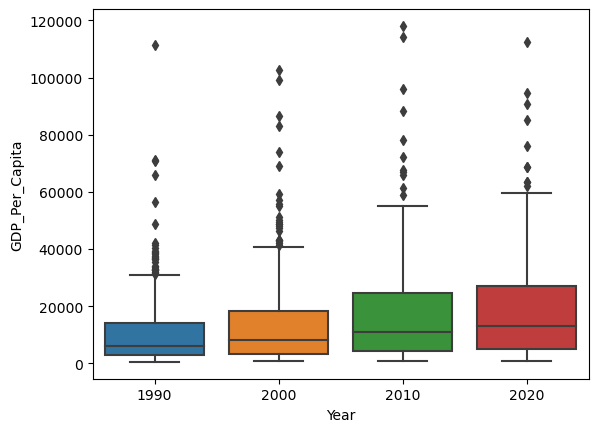

In [29]:
#boxplot
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
plt.show()

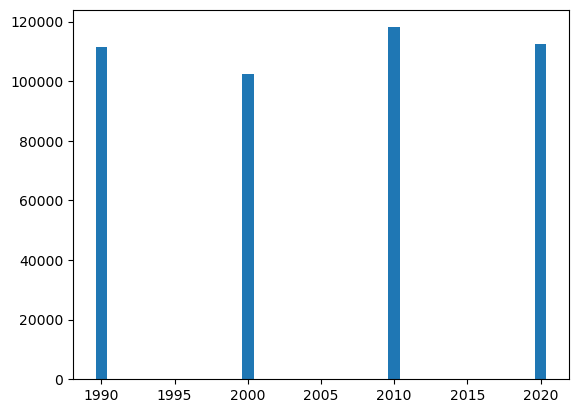

In [30]:
#bar plot
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.show()

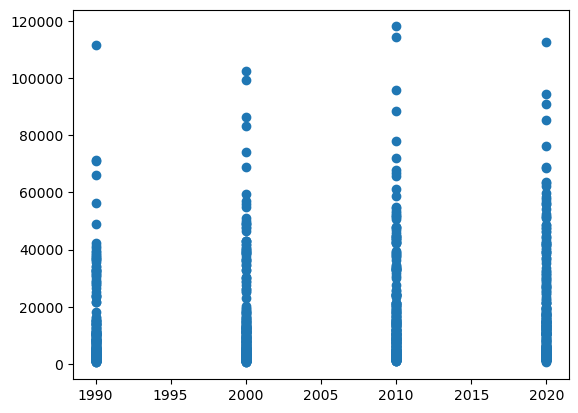

In [35]:
#scatter plot
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.show()

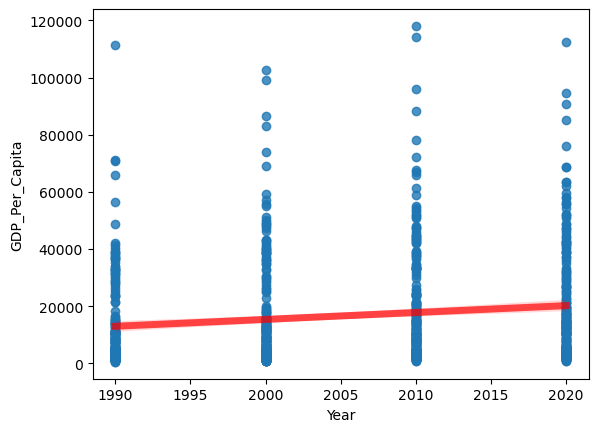

In [32]:
# color : color of the line, alpha : opacity value of the line, lw : line width
# A scatterplot with a trend line
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?
